In [16]:
#Importing libraries

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, balanced_accuracy_score, roc_auc_score, accuracy_score
)

In [10]:
# Loading the datasets
from sklearn.datasets import load_digits

digits = load_digits()


In [12]:
# Selecting features and target
X = digits.data
Y = digits.target

# Splting traning and testing data (80% train and 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=72, shuffle=True)

# Standardize the features since KNN is sensitive when scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Defining the model
k = 5
model_knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model
model_knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [13]:
# Predictions
pred_svm = model_knn.predict(X_test)
y_prob = model_knn.predict_proba(X_test)

# Evaluations
bal_acc_knn = balanced_accuracy_score(Y_test, pred_svm)
roc_knn = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="macro")

print(f"KNN Balanced Accuracy: {bal_acc_knn:.4f}")
print(f"KNN ROC-AUC Score: {roc_knn:.4f}")

Default KNN Balanced Accuracy: 0.9761
Default KNN ROC-AUC Score: 0.9945


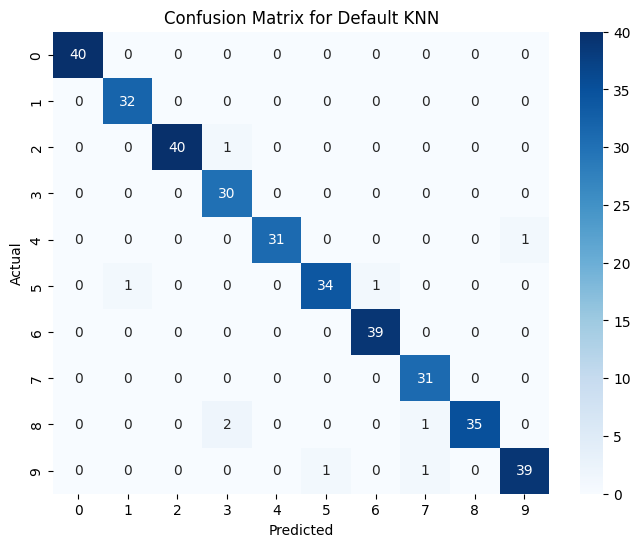

In [17]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(Y_test, pred_svm), annot=True, fmt="d", cmap="Blues", xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Default KNN")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_neighbors": [3, 5, 7, 9, 11],  # Number of neighbors
    "weights": ["uniform", "distance"],  # Voting strategy
    "metric": ["euclidean", "manhattan", "minkowski"]  # Distance metric
}

# Perform GridSearch
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring="balanced_accuracy", verbose=1)
grid_search_knn.fit(X_train, Y_train)

# Best Parameters
best_knn = grid_search_knn.best_estimator_
print(f"\nBest KNN Parameters: {grid_search_knn.best_params_}")

In [ ]:
# Get the best parameters from GridSearchCV
best_k = grid_search_knn.best_params_["n_neighbors"]  
best_weights = grid_search_knn.best_params_["weights"]
best_metric = grid_search_knn.best_params_["metric"]

# Train optimized KNN model with best parameters
optimal_model_knn = KNeighborsClassifier(n_neighbors=best_k, weights=best_weights, metric=best_metric)
optimal_model_knn.fit(X_train, Y_train)

# Predictions
optimal_pred_knn = optimal_model_knn.predict(X_test)
optimal_prob_knn = optimal_model_knn.predict_proba(X_test)

# Evaluate performance
bal_acc_optimized = accuracy_score(Y_test, optimal_pred_knn)
roc_auc_optimized = roc_auc_score(Y_test, optimal_prob_knn, multi_class="ovr")

print(f"Optimized KNN Balanced Accuracy: {bal_acc_optimized:.4f}")
print(f"Optimized KNN ROC-AUC Score: {roc_auc_optimized:.4f}")